In [ ]:
import sys
sys.path.append("../src")

%load_ext autoreload
%autoreload 2

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data_loader import get_data_loaders
from model import get_resnet18
from train import train_model
from evaluate import evaluate_model
from grad_cam import GradCAM
from utils import save_model, load_model, predict_image

In [21]:
from model import get_resnet18
model = get_resnet18(num_classes=4)

In [ ]:
dataset_path = "../dataset"  


data_loaders = get_data_loaders(dataset_path, batch_size=32)
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:
NUM_CLASSES = 4

model = get_resnet18(num_classes=NUM_CLASSES)

print("Model defined.")

c:\Users\MOHAMMED YASEEN\OneDrive\Desktop\brain_tumor\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\MOHAMMED YASEEN\OneDrive\Desktop\brain_tumor\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model defined.


In [ ]:
NUM_EPOCHS = 15
LEARNING_RATE = 0.001
PATIENCE = 5  

trained_model, loss_history = train_model(
    model=model,
    dataloaders=data_loaders,
    num_epochs=NUM_EPOCHS,
    lr=LEARNING_RATE,
    patience=PATIENCE
)


save_model(trained_model, "../models/resnet18_best.pth")

Epoch 1/15


Training: 100%|██████████| 146/146 [05:09<00:00,  2.12s/it]


Train Loss: 0.0822
Val Accuracy: 0.9253
Model saved to resnet18_best.pth
Epoch 2/15


Training: 100%|██████████| 146/146 [07:16<00:00,  2.99s/it]


Train Loss: 0.0438
Val Accuracy: 0.9184
Model saved to resnet18_best.pth
Epoch 3/15


Training: 100%|██████████| 146/146 [06:04<00:00,  2.50s/it]


Train Loss: 0.0504
Val Accuracy: 0.8003
Epoch 4/15


Training: 100%|██████████| 146/146 [05:35<00:00,  2.30s/it]


Train Loss: 0.0441
Val Accuracy: 0.9392
Epoch 5/15


Training: 100%|██████████| 146/146 [03:38<00:00,  1.50s/it]


Train Loss: 0.0482
Val Accuracy: 0.8854
Epoch 6/15


Training: 100%|██████████| 146/146 [04:10<00:00,  1.72s/it]


Train Loss: 0.0361
Val Accuracy: 0.9392
Model saved to resnet18_best.pth
Epoch 7/15


Training: 100%|██████████| 146/146 [03:36<00:00,  1.49s/it]


Train Loss: 0.0370
Val Accuracy: 0.9358
Epoch 8/15


Training: 100%|██████████| 146/146 [08:34<00:00,  3.52s/it] 


Train Loss: 0.0383
Val Accuracy: 0.9444
Epoch 9/15


Training: 100%|██████████| 146/146 [03:49<00:00,  1.57s/it]


Train Loss: 0.0270
Val Accuracy: 0.9375
Model saved to resnet18_best.pth
Epoch 10/15


Training: 100%|██████████| 146/146 [04:03<00:00,  1.67s/it]


Train Loss: 0.0271
Val Accuracy: 0.9358
Epoch 11/15


Training: 100%|██████████| 146/146 [03:21<00:00,  1.38s/it]


Train Loss: 0.0304
Val Accuracy: 0.9132
Epoch 12/15


Training: 100%|██████████| 146/146 [02:37<00:00,  1.08s/it]


Train Loss: 0.0364
Val Accuracy: 0.9271
Epoch 13/15


Training: 100%|██████████| 146/146 [03:21<00:00,  1.38s/it]


Train Loss: 0.0402
Val Accuracy: 0.9115
Epoch 14/15


Training: 100%|██████████| 146/146 [02:53<00:00,  1.19s/it]


Train Loss: 0.0241
Val Accuracy: 0.9583
Model saved to resnet18_best.pth
Epoch 15/15


Training: 100%|██████████| 146/146 [20:02<00:00,  8.24s/it]   


Train Loss: 0.0198
Val Accuracy: 0.9410
Model saved to resnet18_best.pth
Training complete.
Model saved to ../models/resnet18_best.pth


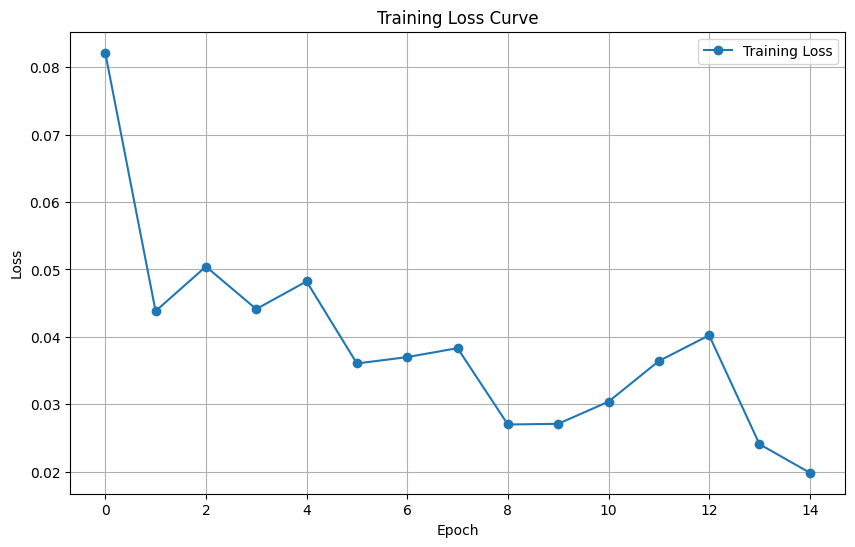

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label="Training Loss", marker="o")
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
np.save("../models/loss_history.npy", np.array(loss_history))
print("Loss history saved.")

Loss history saved.


In [6]:
import sys
sys.path.append("..")  # Adjust based on where your src folder is

from data_loader import get_data_loaders
from model import get_resnet18
from train import train_model